In [1]:
#IMPORT CONSTANTS

import numpy as np
from matplotlib import pyplot as plt
import cv2
%matplotlib inline
import copy


import vision_tools as vt


In [2]:
cv2.destroyAllWindows()

In [3]:
import kinect_vision as kv
from kinect_vision import PATH_TO_KINECT_IMAGES_DIR

In [4]:
#kv.run_kinect_server()
#directory = kv.run_kinect_server()
directory = PATH_TO_KINECT_IMAGES_DIR

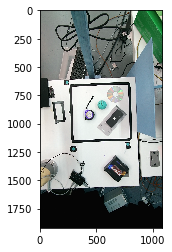

In [5]:
test_num = str(1)

test = kv.load_npz_as_array("im_array_"+test_num, directory)
cali = kv.load_npz_as_array("im_array_cal"+test_num, directory)
empt = kv.load_npz_as_array("im_array_empty"+test_num, directory)


plt.imshow(test['rgb'])

In [6]:
t,td, tir = kv.prepare_im_array(test)
e, ed, eir = kv.prepare_im_array(empt)
c, cd, cir = kv.prepare_im_array(cali)

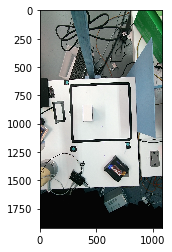

In [7]:
plt.imshow(c)

{'radius': [5, 8], 'thresh': [85, 220]}
8
All Calibration points found
(919.66644, 920.5412, 928.58282)
done


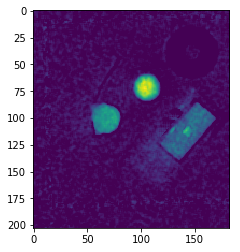

In [8]:
#Find crop
CAL_PARAM = {'thresh': [85,220],
            'radius': [5, 8]}

eir2 = vt.convert2gray(eir*255, "uint8")
eir3 = vt.black_out(eir2, [140,370,100,330])

e_c, e_cimg=vt.find_circles(eir3, 2, param=CAL_PARAM, blur=3, show=False)
e_sort,crop = vt.sort_circles3(e_c)
e_img = vt.crop_out(ed,crop)

#get normclean
t_img = vt.crop_out(td, crop)
c_img = vt.crop_out(cd, crop)

t_img = vt.clean_image(t_img)

e_img = vt.clean_image(e_img)

c_img = vt.clean_image(c_img)



print (t_img.max(), e_img.max(), c_img.max())
normclean = vt.create_normalised_image(t_img, e_img, c_img)
print "done"

plt.imshow((normclean*255).astype('uint8'))

In [9]:
td.max()

1803.5927

[1]
[3]
[5]


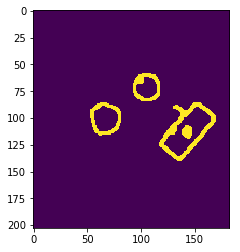

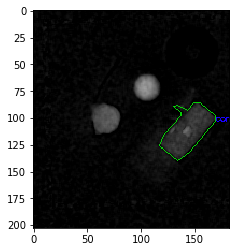

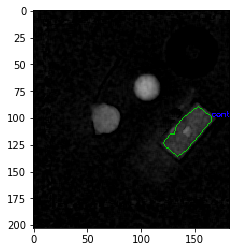

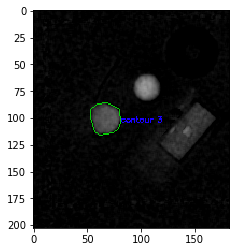

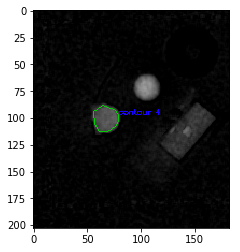

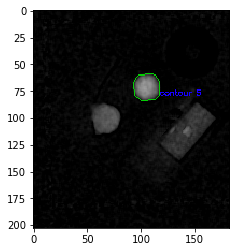

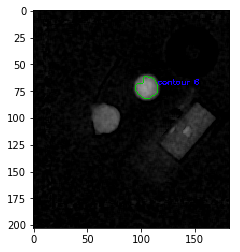

In [10]:
normclean_uint8 = (normclean*255).astype('uint8')

edged, img, cnts, hierarchy  = vt.extract_contours(normclean_uint8, 
                                                   min_thresh=20, 
                                                   max_thresh=90, 
                                                   dilate=2, 
                                                   erode=1)
plt.imshow(edged)
new_cnts, new_h = kv.extract_depth_contours(cnts, hierarchy, 
                                            normclean*255, 
                                            minsize=200,
                                            show=True)
family = kv.create_family(new_cnts, new_h)
sorted_family = kv.sort_family(family, normclean, show=False, debug=False)

In [11]:
type(sorted_family[0]['contour'])

list

In [13]:
sorted_family[0].keys()

['generation', 'height', 'id', 'contour', 'children']

In [10]:
for member in sorted_family:
    if member['generation']==0:
        mask = vt.create_contour_mask(member['contour'], normclean)
        plt.figure()
        plt.imshow(mask)
        

NameError: name 'sorted_family' is not defined

In [11]:
test = kv.load_npz_as_array("im_array_"+test_num, directory)
cali = kv.load_npz_as_array("im_array_cal"+test_num, directory)
empt = kv.load_npz_as_array("im_array_empty"+test_num, directory)

In [12]:
#resize
t = cv2.resize(t, (0,0), fx=0.5, fy=0.5)
e = cv2.resize(e, (0,0), fx=0.5, fy=0.5)

{'radius': [5, 8], 'thresh': [85, 220]}
22
All Calibration points found
Quit
(183, 203)
(183, 203)
(183, 203)
(255, 255)
done


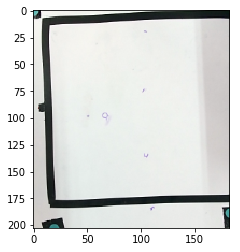

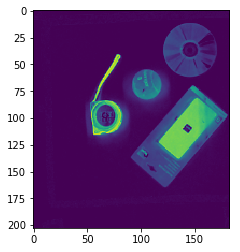

In [13]:


#Find crop
CAL_PARAM = {'thresh': [85,220],
            'radius': [5, 8]}

e2 = vt.convert2gray(e*255, "uint8")
e3 = vt.black_out(e2, [300,630,100,430])

ergb_c, ergb_cimg=vt.find_circles(e3, 2, param=CAL_PARAM, blur=3, show=True)
ergb_sort,rgbcrop = vt.sort_circles3(ergb_c)
ergb__img = vt.crop_out(e,rgbcrop)

#get normclean
trgb__img = vt.crop_out(t, rgbcrop)

depth_shape = (np.shape(t_img)[1], np.shape(t_img)[0])
print depth_shape

ergb_img = vt.resize_image(ergb__img, shape=depth_shape)
trgb_img = vt.resize_image(trgb__img, shape=depth_shape)
plt.figure()
plt.imshow(ergb_img)
#ergb_img = vt.clean_image(ergb_img)

print (trgb_img.max(), ergb_img.max())
rgbnormclean = vt.create_normalised_image(trgb_img, ergb_img)
print "done"
plt.figure()
plt.imshow((rgbnormclean*255).astype('uint8'))

In [14]:
rgbnormclean_uint8 = (rgbnormclean*255).astype('uint8')

edged, img, cnts, hierarchy  = vt.extract_contours(rgbnormclean_uint8, 
                                                   min_thresh=10, 
                                                   max_thresh=100, 
                                                   dilate=3, 
                                                   erode=1,
                                                   cnt_mode = cv2.RETR_TREE)


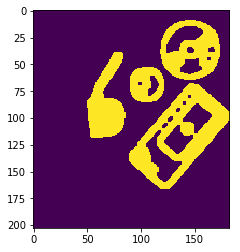

In [15]:
plt.imshow(edged)

In [16]:
rgb_family = kv.create_family(cnts, hierarchy)


[1, 2, 3, 4, 5, 6, 7, 8]
[10, 11]
[14, 15, 16, 17, 18]


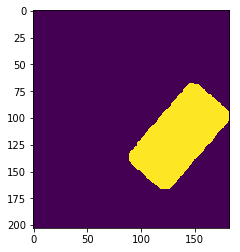

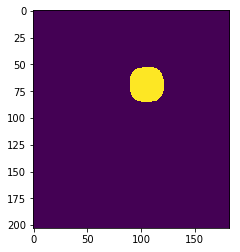

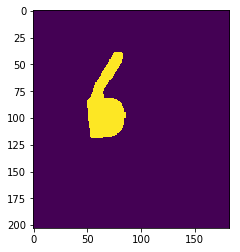

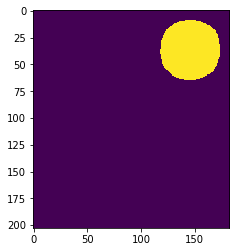

In [17]:
for member in rgb_family:
    if member['generation']==0:
        mask = vt.create_contour_mask([member['contour']], rgbnormclean)
        plt.figure()
        plt.imshow(mask)

In [20]:
rgb_family.keys()

AttributeError: 'list' object has no attribute 'keys'

In [155]:
class TableObject(object):
    
    def __init__(self, member=None, family=None, rgb_member=None, name="Unknown"):
        
        if member is not None:
            self.contour = member['contour']
            self.height = member['height']
            self.children = member['children']
            self.generation = member['generation']
            self.name = name

            #Call all methods
            TableObject.find_children(self, family)
            self.box = self.extract_minBox(self.contour)
            self.centre, self.radius = TableObject.extract_minCircle(self,self.contour)
            self.area = TableObject.find_objectArea(self, self.contour)
        
        elif rgb_member is not None:
            self.height = 0
            self.children = []
            self.generation = 0
            self.name = name
        
        else:
            print "This object does not exist"
        
        if rgb_member is not None:
            self.item_contour = [rgb_member['contour']]
            
            self.rgb_box = TableObject.extract_minBox(self, self.item_contour)
            self.rgb_centre, self.rgb_radius = TableObject.extract_minCircle(self, self.item_contour)
            self.rgb_area = TableObject.find_objectArea(self, self.item_contour)
        
    def find_children(self,family):
        children_list = []
        for child in self.children:
            children_list.append(family[child])
        self.children_info = children_list
    
    def extract_minBox(self, contour):
        box = cv2.minAreaRect(contour[0])
        box = cv2.boxPoints(box)
        box = np.array(box, dtype="int")
        return box
    
    def extract_minCircle(self, contour):
        centre, radius = cv2.minEnclosingCircle(contour[0])
        return centre, radius
        
    def draw_minBox(self, image, box):
        img = copy.copy(image)
        cv2.drawContours(img, [box], -1, (255,0,0), 1)
        plt.figure()
        plt.imshow(img)
        
    def draw_minCircle(self, image, centre, radius):
        img = copy.copy(image)
        cent = (int(centre[0]), int(centre[1]))
        radi = int(radius)
        cv2.circle(img, cent, radi, (0,255,0), 1)
        plt.figure()
        plt.imshow(img)
    
    def find_objectArea(self, contour):
        area = cv2.contourArea(contour[0])
        return area
    
    def find_objectPerimeter(self, contour):
        perimeter = cv2.arcLength(contour[0],True)
        return perimeter
    
    def print_children_attributes(self):
        print ("Children Info:")
        for i,child in enumerate(self.children_info):
            print (i, child['generation'], child['children'],child['height'])
            
    def print_object_attributes(self, children_info=False):
        object_attr = [attr for attr in dir(self) 
                       if not callable(getattr(self, attr)) 
                       and not attr.startswith("__")]
        for attr in object_attr:
            if attr != 'children_info':
                print attr, ": ", getattr(self, attr)
    
    def return_object_attributes(self, children_info=False):
        object_attr = [attr for attr in dir(self) 
                       if not callable(getattr(self, attr)) 
                       and not attr.startswith("__")]
        object_dict = {}
        for attr in object_attr:
            if attr != 'children_info':
                object_dict[attr]=getattr(self, attr)
        return object_dict
        
    def filter_object(self, image, show_contour = False):
        try:
            contour = self.item_contour
            print "item"
        except:
            contour = self.contour
            print "depth"
        #print contour
        img = copy.copy(image)
        obj_mask = vt.create_contour_mask(contour, img)
        out = np.zeros_like(image)
        
        if show_contour:
            cv2.drawContours(img, [self.contour], -1, (255,0,0), 1)
        out[obj_mask==255] = img[obj_mask==255]
        return out
    
    def label_object(self, image):
        out = TableObject.filter_object(self, image)
        plt.figure(str(self.name))
        plt.imshow(out)
        plt.show()
        name = raw_input("Name of object?: ")
        self.name = name
    
    def add_depth(self, depth_object):
        self.contour = depth_object.contour
        self.height = depth_object.height
        self.children = depth_object.children
        self.generation = depth_object.generation

        #Call all methods
        self.children_info = depth_object.children_info
        self.box = depth_object.box
        self.centre = depth_object.centre
        self.radius = depth_object.radius
        self.area = depth_object.area

    #def store_object_attributes(self, filename):
        

In [162]:
def normclean2cv2(image):
    img = copy.copy(image)
    img = img*255
    img = img.astype("uint8")
    return img

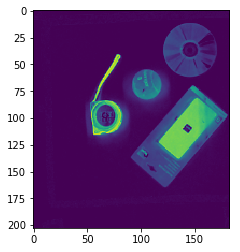

In [156]:
rgbnormclean_uint8 = (rgbnormclean*255).astype("uint8")
plt.imshow(rgbnormclean_uint8)

depth


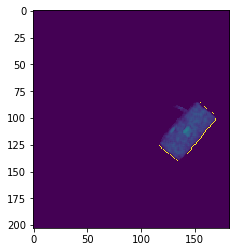

Name of object?: a
depth


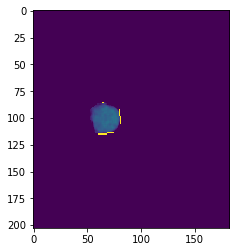

Name of object?: 
depth


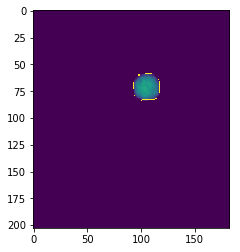

Name of object?: 
item


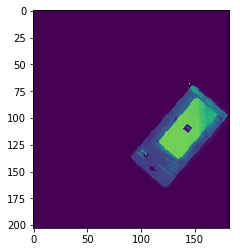

Name of object?: a
item


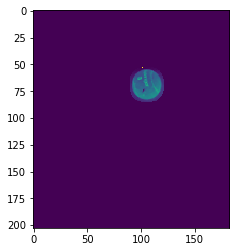

Name of object?: b
item


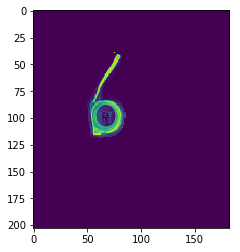

Name of object?: 
item


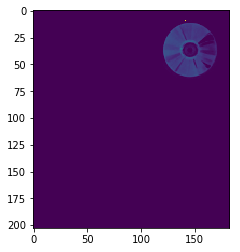

Name of object?: d


AttributeError: 'str' object has no attribute 'name'

In [158]:
copy_img = copy.copy(rgbnormclean_uint8)

obj_id = 0
def find_object(image, family=None, rgb_family=None):
    Object_List = {}
    img = copy.copy(image)
    if family is None:
        curr_family = rgb_family  
    else:
        curr_family = family
    for obj in curr_family:
        if obj['generation']==0:
            box = cv2.minAreaRect(np.array(obj['contour'])[0])
            box = cv2.boxPoints(box)
            box = np.array(box, dtype="int")
            cv2.drawContours(img, [box], -1, (255,0,0), 1)
            
            if rgb_family is None:
                tobj = TableObject(member = obj, family = family)
            else:
                tobj = TableObject(rgb_member = obj)
            TableObject.label_object(tobj, img)
            Object_List[tobj.name] = tobj
    
    return Object_List

        
def match_rgb_with_depth(family, rgb_family, image, rgb_image):
    img = copy.copy(image)
    rgb_img = copy.copy(rgb_image)
    
    depth_obj_list = find_object(family=family, image=img)
    obj_list = find_object(rgb_family=rgb_family, image=rgb_img)
    
    for item in obj_list.keys():
        if item in depth_obj_list.keys():
            obj_list[item].add_depth(depth_obj_list[item])
    
    return depth_obj_list
    
match_rgb_with_depth(family, rgb_family, normclean_uint8, rgbnormclean_uint8)
#find_object(rgbnormclean_uint8, rgb_family=rgb_family)

depth


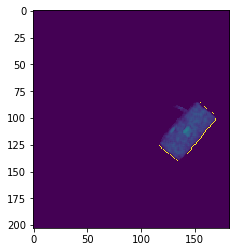

Name of object?: a
depth


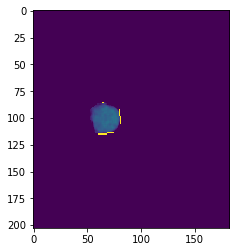

Name of object?: b
depth


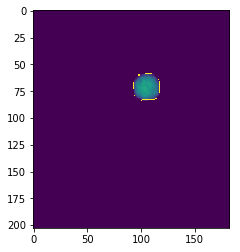

Name of object?: c
item


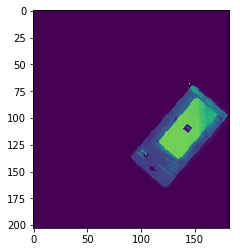

Name of object?: a
item


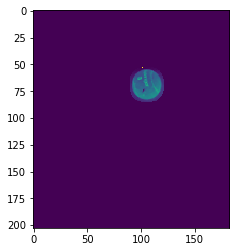

Name of object?: b
item


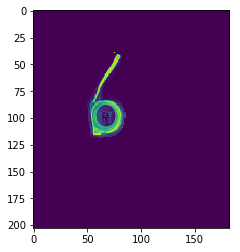

Name of object?: 
item


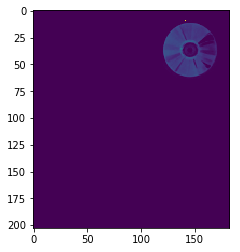

Name of object?: 


In [159]:
img = copy.copy(normclean_uint8)
rgb_img = copy.copy(rgbnormclean_uint8)

depth_obj_list = find_object(family=family, image=img)
obj_list = find_object(rgb_family=rgb_family, image=rgb_img)



In [161]:
obj_list['a'].print_object_attributes()

area :  1515.5
box :  [[136 142]
 [106 117]
 [141  74]
 [171  99]]
centre :  (143.0, 112.0)
children :  [1]
contour :  [array([[[155,  86]],

       [[149,  86]],

       [[143,  93]],

       [[134,  88]],

       [[130,  89]],

       [[137,  95]],

       [[137,  98]],

       [[121, 116]],

       [[117, 126]],

       [[134, 140]],

       [[145, 132]],

       [[169, 103]],

       [[169,  98]]])]
generation :  0
height :  (0.086152188, 0.090818018, 0.31600013, 0.0)
item_contour :  [array([[[145,  68]],

       [[139,  74]],

       [[139,  75]],

       [[134,  80]],

       [[134,  81]],

       [[128,  87]],

       [[128,  88]],

       [[120,  96]],

       [[120,  97]],

       [[115, 102]],

       [[115, 103]],

       [[107, 111]],

       [[107, 112]],

       [[100, 119]],

       [[100, 120]],

       [[ 97, 123]],

       [[ 97, 126]],

       [[ 96, 127]],

       [[ 95, 127]],

       [[ 92, 130]],

       [[ 91, 130]],

       [[ 90, 131]],

       [[ 90, 132]],



In [74]:
Object_List[0].print_object_attributes()

area :  1515.5
box :  [[136 142]
 [106 117]
 [141  74]
 [171  99]]
centre :  (143.0, 112.0)
children :  [1]
contour :  [array([[[155,  86]],

       [[149,  86]],

       [[143,  93]],

       [[134,  88]],

       [[130,  89]],

       [[137,  95]],

       [[137,  98]],

       [[121, 116]],

       [[117, 126]],

       [[134, 140]],

       [[145, 132]],

       [[169, 103]],

       [[169,  98]]])]
generation :  0
height :  (0.086152188, 0.090818018, 0.31600013, 0.0)
name :  eraser
radius :  29.5297451019


In [47]:
rgb_item = []
for rgb_member in rgb_family:
    if rgb_member['generation']==0:
        rgb_item.append(rgb_member)

4

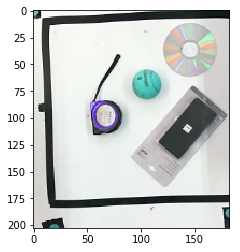

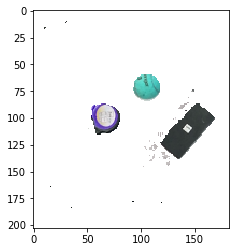

In [45]:
plt.imshow(trgb_img)
plt.figure()
mask = np.zeros_like(normclean)
mask[normclean>0.1] = 255
out = np.zeros_like(trgb_img)
out[mask==255] = trgb_img[mask==255]
plt.imshow(out)

In [52]:
import pandas as pd

def create_object_df():
    obj_df = pd.DataFrame(columns = ['name', 'area', 'aspect', 'fill', 'circularness', 'number of children'])
    return obj_df

0

In [57]:
def prepare_object_dict(tableObject, obj_df):
    copy.copy(tableObject)
    object_dict = tableObject.return_object_attributes()
    
    # Find fill:
    boundBoxArea = cv2.contourArea(tableObject.box)
    fill = tableObject.area/boundBoxArea
    object_dict['fill'] = fill
    
    #Find aspect:
    box = tableObject.box
    first_line = np.sqrt(sum((box[1]-box[0])**2))
    second_line = np.sqrt(sum((box[2]-box[1])**2))
    aspect = first_line/second_line
    if aspect > 1:
        aspect = second_line/first_line
    object_dict['aspect'] = aspect
    
    # Find Circularness:
    boundCircleArea = np.pi*(tableObject.radius)**2
    circularness = tableObject.area/boundCircleArea
    object_dict['circularness'] = circularness
    
    #Number of children:
    object_dict['number of children'] = len(tableObject.children)
    print len(tableObject.children)
    
    for key in object_dict.keys():
        if key not in obj_df.head():
            del object_dict[key]
    return object_dict

In [58]:
object_dict = prepare_object_dict(Object_List[0], object_df)
object_dict2 = prepare_object_dict(Object_List[1], object_df)

1
1


In [59]:
object_df = create_object_df()
object_df = object_df.append(object_dict, ignore_index=True)
object_df.append(object_dict2, ignore_index=True)

,name,area,aspect,fill,circularness,number of children,children
0,eraser,1515.5,0.704341,0.700000,0.553206,1,[1]
1,tape measure,671.5,0.965889,0.817905,0.821209,1,[3]


In [60]:
object_df = create_object_df()
for item in Object_List:
    dic = prepare_object_dict(item, object_df)
    object_df = object_df.append(dic, ignore_index=True)

1
1
1


In [69]:
object_df

,name,area,aspect,fill,circularness,number of children
0,eraser,1515.5,0.704341,0.700000,0.553206,1
1,tape measure,671.5,0.965889,0.817905,0.821209,1
2,ball,512.0,1.000000,0.882759,0.864574,1


In [27]:
a=Object_List[0].return_object_attributes()
for key in a.keys():
    print key

box
name
centre
generation
area
contour
radius
height
children


In [171]:
a = [1,2,3,4,5]
b = a[a<4]
np.mean(a)

3.0

In [29]:
bbbb = Object_List[0].box

In [72]:
object_df

,name,area,aspect,fill,circularness,number of children
0,eraser,1515.5,0.704341,0.700000,0.553206,1
1,tape measure,671.5,0.965889,0.817905,0.821209,1
2,ball,512.0,1.000000,0.882759,0.864574,1


In [73]:
def create_csv(filename, df):
    if len(filename)>4:
        if filename[-4:]!=".csv":
            filename = filename + ".csv"
    header = df.keys()
    df.to_csv(filename, columns = header)
    print "done"

In [74]:
create_csv("object.csv", object_df)

done


In [75]:
rgb_family

NameError: name 'rgb_family' is not defined